#가중치 시각화
합성곱 층은 여러 개의 필터를 사용해 이미지에서 특징을 학습한다. 각 필터는 커널이라 부르는 가중치와 절편을 가지고 있다. 일반적으로 절편은 시각적으로 의미가 있지 않다, 가중치는 입력 이미지의 2차원 영역에 적용되어 어떤 특징을 크게 두드러지게 표현하는 역할을 한다.

이전절에서 만든 모델이 어떤 가중치를 학습했는지 확인하기 위해 체크포인트 파일을 읽어 들인다.

In [46]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

케라스 모델에 추가한 층은 layers 속성에 저장되어 있다. 이 속성은 리스트 형태이다.

In [47]:
model.layers

Conv2D, MaxPooling2D 층이 번갈아 2번 연속 등장한다.     
그 다음 Flatten 층과 Dense 층, Dropout 층이 차례로 등정한다. 마지막에는 Dense 층이 놓여있다.

첫번째 합성 곱 층의 가중치를 조사한다. 층의 가중치와 절편은 층의 weights 속성에 저장되어 있다.      
첫 번째 원소는 가중치이고 두 번째 원소는 절편이다.

In [48]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


이전 절에서 커널의 크기를 (3,3 )으로 지정했고 이 합성곱 층에 전달되는 입력의 깊이가 1이므로 실제 커널의 크긴ㄴ (3, 3, 1)이다. 또한 필터의 개수가 32개이므로 weights의 첫 번째 원소인 가중치의 크기는 (3, 3, 1, 32)이다.

절편의 개수는 필터마다 1개의 절편이 있으므로 (32, )가 된다.

다음으로 conv 배열을 넘파이 배열로 변환하고 평군과 표준 편차를 구한다.

In [49]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.033471055 0.102287605


평균은 거의 0에 가깝고, 표준 편차는 0.1 정도이다. 이를 히스토그램으로 나타내본다.

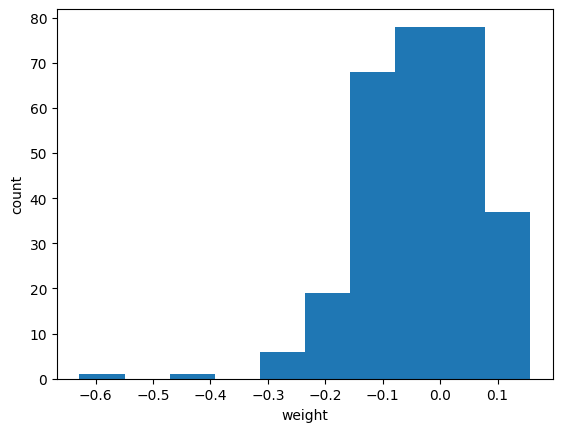

In [50]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

팻플롯립의 hist() 함수에는 히스토그램을 그리기 위해 1차원 배열로 전달해야 한다.

히스토그램은 0을 중심으로 종 모양 분포를 그리고 있다.

다음으로는 32개의 커널을 16개씩 두 줄에 출력해본다.. 맷플롯립의 subplots() 함수를 사용해 32개의 그래프 영역을 만들고 순서대로 커널을 출력한다.

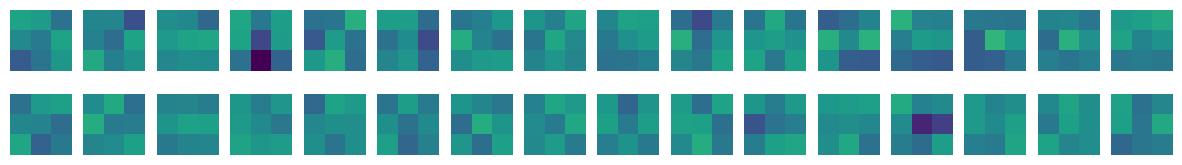

In [51]:
fig, axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i,j].axis('off')
plt.show()

히스토그램을 보면 이 가중치 값이 무작위로 나열된 것이 아니라 어떤 패턴을 볼 수 있다.      


imshow 함수는 배열에 있는 최댓값과 최솟값을 사용해 픽셀의 강도를 표현한다.     
어떤 절댓값으로 기준을 정해서 픽셀의 강도르르 나타내기 위해 vmin과 vmax으로 컬러맵으로 표현할 번위를 지정한다.

다음으로 훈련하지 않은 빈 합성곱 신경망을 만들어 훈련한 가중치와 비교해번다.

먼저 Sequential 클래스로 모델을 만들고 Conv2D 층을 하나 만든다.

In [52]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

그 다음 이 모델의 첫 번재 층의 가중치를 no_training_conv에 저장한다.

In [53]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


위에서 출력한 훈련된 모델의 가중치와 같다. 이 가중치의 평균과 표준 편차를 확인한다.

In [54]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.0002335487 0.082675464


평균은 훈련된 모델과 비슷하게 0에 가깝고 표준편차는 작음 값이 출력된다.     
이 가중치 배열을 히스토그램으로 표현한다.

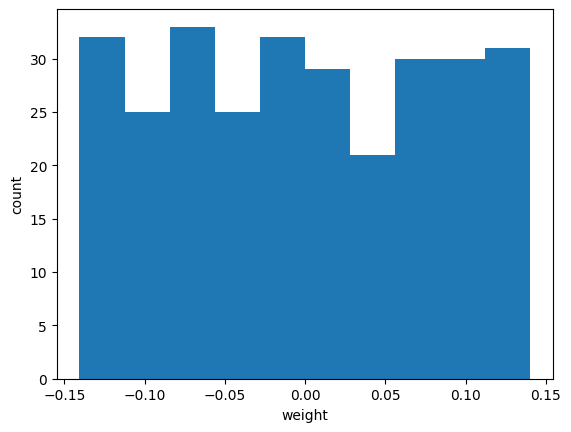

In [55]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

훈련된 데이터와는 매우 다른 그래프이다. 대부분의 가중치가 -0.15 에서 0.15 사이에 있고 고른 분포를 보여준다.      
이러한 이유는 텐서플로가 신경망의 가중치를 처음 초기화할 대 균등 분포에서 랜덤하게 값을 선택하기 때문이다.

이 가중치 값을 imshow() 함수를 사용해 그림으로 출력해본다.

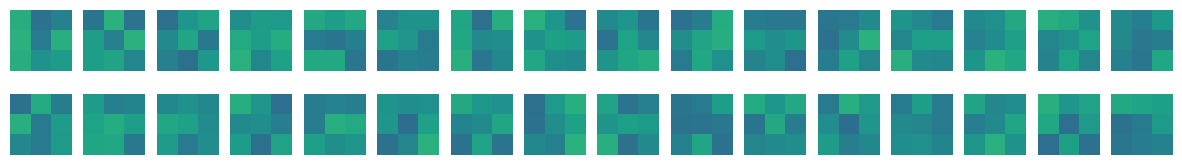

In [56]:
fig, axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i,j].axis('off')
plt.show()

전체적으로 고른 분포를 보여준다. 이전 가중치와 비교했을 때 합성곱 신경망이 패션 MNIST 데이터셋의 분류 정확도를 높이기 위해 유용한 패턴을 학습했다.

#함수형 API
입력과 출력이 모두 2개인것과 같은 복잡한 모델을 만들기 위해서는 Sequential 클래스를 사용하기 어렵다.     
이때, 함수형 API를 사용한다.

함수형 API는 케라스의  Model 클래스를 사용하여 모델을 만든다. 아래는 Dense 층 2개로 이루어진 완전 연결 신경망을 함수형 API로 구현하는 과정이다.

먼저 2개의 Dense 층을 만든다.



*   dense1 = keras.layers.Dense(100, activation='sigmoid')
*   dense2 = keras.layers.Dense(10, activation='softmax')


이 객체를 Sequential 클래스 객체의 add() 메서드에 전달할 수 있다. 하지만 다음과 같이 함수처럼 호출할 수도 있다.



*   hidden = dense1(inputs)



이때 inputs는 InputLayer(첫 번재 층)에 자동으로 들어가는 클래스이다.

객체를 함수처럼 호출했을 때, 적절히 동작하여 입력값 inputs 를 Dense 층에 통과시킨 후 출력값 hidden을 만들어준다.

다음으로 두 번째 층을 호출한다. 첫 번재 층의 출력을 입력으로 사용한다.



*   outputs = dense2(hidden)




그 다음 input 과 outputs 를 Model 클래스로 연결해 주면 된다.

model = keras.Model(inputs, outputs)

입력에서 출력까지 층을 연결해주고 Model 클래스에 입력과 최종 출력을 지정한다.

케라스는 InputLayer 클래스 객체를 쉽게 다룰수 있도록  Input 함수를 별도로 제공한다. 입력의 크기를 지정하는 shape 매개변수와 함께 이 함수를 호출하면 InputLayer 클래스 객체를 만들어 출력을 반환한다.



*   inputs = keras.Input(shape=(784,))



model.input으로 이 모델의 입력 형태를 얻을 수 있다.

In [57]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


model.input 과 model.Model(model.input, model.layers[0].output을 연결하는 새로운 conv_acti 모델을 만들수 있다.

In [58]:
conv_acti = keras.Model(model.input, model.layers[0].output)

model 객체의 predict 메서드를 호출하면 최종 출력층의 확률을 반환한다.    
하지만 conv_acti의  predict() 메서드를 호출하면 첫 번재 Conv2D의 출력을 반환할 것이다.

이제 특성 뱁을 시각화한다.

#특성 맵 시각화
케라스로 패션 MNIST 데이터셋을 읽은 후 훈련 세트에 있는 첫 번째 샘플을 그려본다.

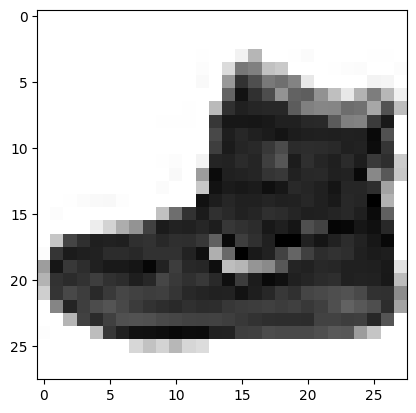

In [59]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

부츠 그림이 출력된다.이 샘플을 conv_ati 모델에 주입해 Conv2D 층이 만드는 특성 맵을 출력해본다. predict() 메서드는 항상 입력의 첫 번째 자원이 배치 차원일 것으로 기대하므로 하나의 샘플을 전달하더라도 곡 첫 번재 차원을 유지해야 한다.

이를 위해 슬라이싱 연산자를 사용해 첫 번째 샘츨을 선택하고 (784,)의 크기를 (28, 28, 1)크기로 변경하고 255로 나눈다.

In [60]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 101ms/step


conv_acti.predict() 메서드가 출력한 feature_maps의 크기를 확인한다.

In [61]:
print(feature_maps.shape)

(1, 28, 28, 32)


세임 패딩과 32개의 필터를 사용한 층의 출력이므로 (28, 28, 32)이다. 첫 번째 차원은 배치 차원이므로 샘플을 하나 입력했기 때문에 1이다.

이제 맷 플롯립의 imshow 함수로 이 특성맵을 그려본다.

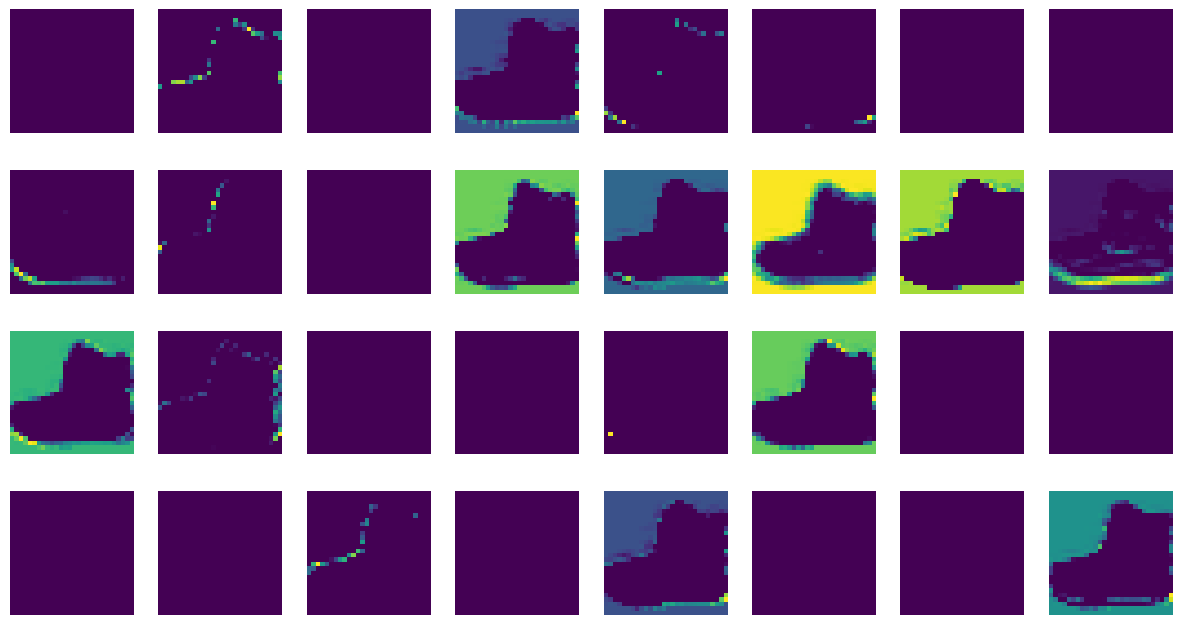

In [64]:
fig, axs = plt.subplots(4,8,figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()

이 특성 맵은 32개의 필터로 이해 입력 이미지에서 강하게 활성화된 부분을 보여준다.     
이때 마지막 필터는 전체적으로 낮은 음수값인데, 부츠의 배경이 상대적으로 크게 활성화되어있디.

두 번째 합성곱 층이 만든 특성 맵도 같은 방식으로 확인할 수 있다. model 객체의 입력과 두 번재 합성곱 층인 model.layers[2]의 출력을 연결한 conv2_acti 모델을 만든다.

In [65]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

다음으로 첫 번째 샘플을 conv2_acti 모델의 predict 메서드에 전달한다.

In [66]:
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 182ms/step


첫 번째 풀링 층에서 가로 세로 크기가 절바능로 줄었고, 두 번재 합성곱 층의 필터 개수는 64개이므로 feature_mpas의 크기는 배치 차원을 제외하면 (14,14,64) 일것이다.

In [67]:
print(feature_maps.shape)

(1, 14, 14, 64)


이제 imshow() 함수로 그려본다.

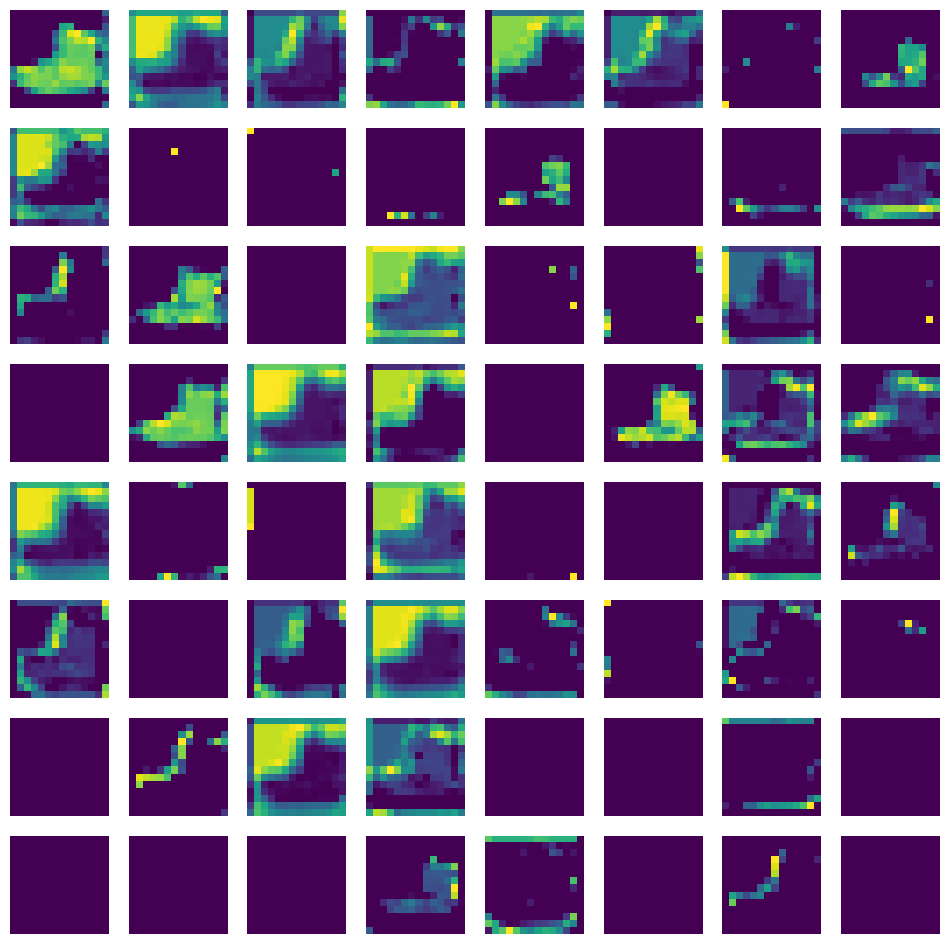

In [68]:
fig, axs = plt.subplots(8,8,figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()

두 번째 특성뱁은 시각적으로 이해하기 어렵다.

두 번재 합성곱 층의 필터 크기는 (3,3,32) 이다. 두 번째 합성곱 층의 첫 번재 필터가 앞서 출력한 32개의 특성 맵과 곱해져 두 번째 합성곱 층의 첫 번째 특성 맵이 된다. 따라서 특성뱁에서 어던 부위를 감지하는지 직관적으로 이해하기 어렵다.